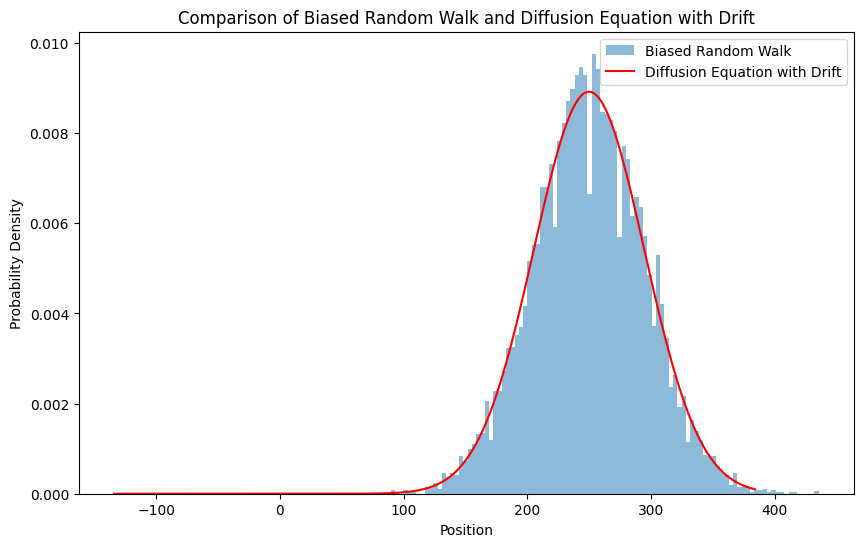

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1  # Diffusion coefficient
v = 0.25  # Drift velocity
N = 10000  # Number of random walkers
num_steps = 10000  # Number of steps
dt = 0.1  # Time step
dx = np.sqrt(2 * D * dt)  # Step size
drift_step = v * dt  # Drift per time step

# Biased Random Walk
positions = np.zeros((N, num_steps))
for i in range(1, num_steps):
    walk_steps = np.random.choice([-dx, dx], size=N) + drift_step
    positions[:, i] = positions[:, i-1] + walk_steps

# Calculate the average position
average_position = np.mean(positions, axis=0)
time = np.arange(num_steps) * dt

# Analytical Solution of Diffusion Equation with Drift
x = np.linspace(-3*np.sqrt(2*D*num_steps*dt), 3*np.sqrt(2*D*num_steps*dt) + v*num_steps*dt, 1000)
analytical_solution = (1 / np.sqrt(4 * np.pi * D * time[-1])) * np.exp(-(x - v*time[-1])**2 / (4 * D * time[-1]))

# Plotting the results
plt.figure(figsize=(10, 6))

# Random Walk
plt.hist(positions[:, -1], bins=100, density=True, alpha=0.5, label='Biased Random Walk')

# Analytical Solution
plt.plot(x, analytical_solution, label='Diffusion Equation with Drift', color='red')

plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Comparison of Biased Random Walk and Diffusion Equation with Drift')
plt.legend()
plt.show()
